Exploratory Data Analysis & Additional Questions

In [1]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Loading dataset

In [3]:
df = pd.read_excel('HospitalDatabase.xlsx', sheet_name=['Patients','EDVisits','AmbulatoryVisits','ReAdmissionRegistry','Discharges',
                                                    'Providers','EDUnique'])
df.keys()

dict_keys(['Patients', 'EDVisits', 'AmbulatoryVisits', 'ReAdmissionRegistry', 'Discharges', 'Providers', 'EDUnique'])

Data set contains 7 sheets. Let's explore each sheet.

In [6]:
#Numbers of rows & columns in the data sheet patients.

patients=df['Patients']
patients.shape

#945 rows & 7 columns

(945, 7)

checking data type of columns & missing values.

In [7]:
patients.info()

#we see language column have missing values in it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PatientID    945 non-null    int64         
 1   FirstName    945 non-null    object        
 2   LastName     945 non-null    object        
 3   DateOfBirth  945 non-null    datetime64[ns]
 4   Gender       945 non-null    object        
 5   Race         945 non-null    object        
 6   Language     937 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 51.8+ KB


checking percentage of missing values.

In [8]:
patients.isnull().sum() / patients.shape[0] * 100

PatientID      0.000000
FirstName      0.000000
LastName       0.000000
DateOfBirth    0.000000
Gender         0.000000
Race           0.000000
Language       0.846561
dtype: float64

Analyzing various metrics

In [9]:
patients.describe()

,PatientID
count,945.000000
mean,473.000000
std,272.942302
min,1.000000
25%,237.000000
50%,473.000000
75%,709.000000
max,945.000000


Checking if there are any duplicate values in the patient_id column

In [11]:
patients.PatientID.value_counts()

#We can conclude that there are no duplicates in Patient_Id column.

1      1
636    1
624    1
625    1
626    1
      ..
320    1
321    1
322    1
323    1
945    1
Name: PatientID, Length: 945, dtype: int64

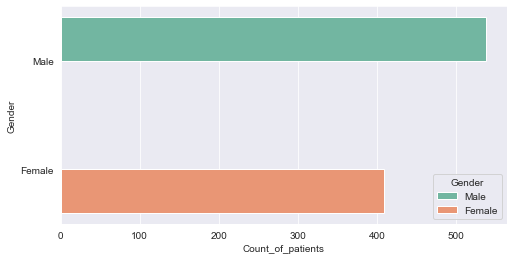

In [24]:
patients.head()
plt.figure(figsize=(8,4))
sb.set_style('darkgrid')
sb.set_palette('Set2')
sb.countplot(data=patients,y='Gender',hue='Gender')
plt.xlabel('Count_of_patients')
plt.ylabel('Gender')
plt.show()
 

Male patients are the highest in number.

Adding Patient's Age column to have more clarity on the data

In [331]:
#dataframe used in this :
patients=df['Patients']
type(patients)

#create a parameter called now to calculate age.

now = pd.to_datetime('now')
patients['Age']=(now - patients['DateOfBirth']).astype('<m8[Y]') 
patients.head()

C:\Users\yasha\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53.0
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0


To visualize number of patients are of which age group.

<AxesSubplot:xlabel='Age', ylabel='PatientID'>

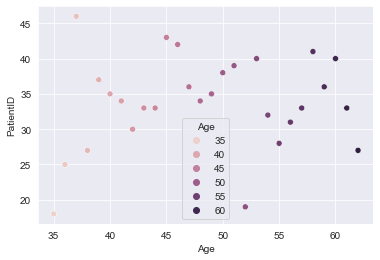

In [43]:
patients_count_age=patients.groupby(['Age'])['PatientID'].count().reset_index()
patients_count_age
#sb.relplot(data=patients, x='Age', y='PatientID', kind='line')
#plt.show()

sb.scatterplot(x='Age', y='PatientID', data=patients_count_age, hue='Age')


here we see some outliers in the patient's age. patients of age 36 - 37 are way more in number & Age 34-35 have the lowest count

To visualize language of the patients.

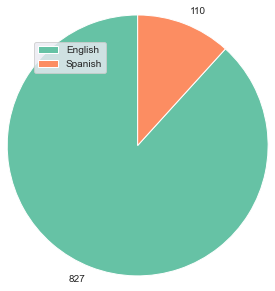

In [49]:
patients_count_race_lang=patients.groupby(['Language'])['PatientID'].count().reset_index()
patients_count_race_lang.head()
plt.pie(patients_count_race_lang["PatientID"], labels= patients_count_race_lang["PatientID"], radius=1.5,startangle=90)
plt.legend(patients_count_race_lang["Language"], loc="best")
plt.show()




Majority patients are who speaks english.

exploring ReAdmissionRegistry to get some insights.

In [50]:
# Numbers of rows & columns in the data sheet ReAdmissionRegistry.

readmission_reg=df['ReAdmissionRegistry']
readmission_reg.shape


(720, 12)

Checking columns and data types

In [52]:
readmission_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   AdmissionID                720 non-null    int64         
 1   PatientID                  720 non-null    int64         
 2   AdmissionDate              720 non-null    datetime64[ns]
 3   DischargeDate              720 non-null    datetime64[ns]
 4   DischargeDisposition       720 non-null    object        
 5   Service                    720 non-null    object        
 6   PrimaryDiagnosis           720 non-null    object        
 7   ExpectedLOS                720 non-null    float64       
 8   ExpectedMortality          720 non-null    float64       
 9   ReadmissionFlag            194 non-null    float64       
 10  DaysToReadmission          194 non-null    float64       
 11  EDVisitAfterDischargeFlag  341 non-null    float64       
dtypes: datet

checking percentage of missing values.

In [53]:
readmission_reg.isnull().sum() / readmission_reg.shape[0] * 100

AdmissionID                   0.000000
PatientID                     0.000000
AdmissionDate                 0.000000
DischargeDate                 0.000000
DischargeDisposition          0.000000
Service                       0.000000
PrimaryDiagnosis              0.000000
ExpectedLOS                   0.000000
ExpectedMortality             0.000000
ReadmissionFlag              73.055556
DaysToReadmission            73.055556
EDVisitAfterDischargeFlag    52.638889
dtype: float64

To veiw the overall metrics of the dataframe.

In [306]:
readmission_reg.describe()

,AdmissionID,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
count,720.000000,720.000000,720.000000,194.0,194.000000,341.0
mean,360.500000,8.824589,0.338063,1.0,5.360825,1.0
std,207.990384,4.034421,0.238868,0.0,3.866116,0.0
min,1.000000,2.012974,0.000006,1.0,1.000000,1.0
25%,180.750000,5.138501,0.139771,1.0,3.000000,1.0
50%,360.500000,8.633825,0.297242,1.0,5.000000,1.0
75%,540.250000,12.107623,0.496387,1.0,5.000000,1.0
max,720.000000,16.998213,0.989945,1.0,19.000000,1.0


In [54]:
# Seeing Patient_ID column in both Patients & ReAdmissionRegistry sheet.
# Joining the Patients & ReAdmissionRegistry sheet with common column PatientID to get some insights.

dfnew_inner= pd.merge(patients,readmission_reg, on='PatientID', how='inner')
dfnew_inner.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0,389,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36.0,635,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,606,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,587,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,6,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,53.0,640,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN


As a part of data cleaning discharge date has both date and timestamp together. Let's separate date and timestamp.

In [94]:
#Doing the below as a part of data cleaning. which will enable us to analyze better.

dfnew_inner['DischargeDate'] = pd.to_datetime(dfnew_inner['DischargeDate'])
dfnew_inner['dis_Date'], dfnew_inner['dis_Time'] = dfnew_inner['DischargeDate'].dt.normalize(), dfnew_inner['DischargeDate'].dt.time
dfnew_inner.head()

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AdmissionID,AdmissionDate,...,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,Date,Time,dis_Date,dis_Time
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62.0,389,2018-01-01,...,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,2018-01-04,00:00:00,2018-01-04,00:00:00
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36.0,635,2018-01-01,...,Flu,3.825969,0.604562,1.0,2.0,1.0,2018-01-04,00:00:00,2018-01-04,00:00:00
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0,606,2018-01-01,...,Flu,3.382493,0.266137,1.0,3.0,1.0,2018-01-04,00:00:00,2018-01-04,00:00:00
3,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0,587,2018-01-01,...,Flu,3.763352,0.307527,1.0,4.0,1.0,2018-01-05,00:00:00,2018-01-05,00:00:00
4,6,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,53.0,640,2018-01-01,...,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,2018-01-05,00:00:00,2018-01-05,00:00:00


Viewing the data based on discharge disposition & Primary Diagnosis:

In [59]:
data_based_dd_pd=dfnew_inner.groupby(['DischargeDisposition','PrimaryDiagnosis'])['PatientID'].count().reset_index()
data_based_dd_pd.head()

,DischargeDisposition,PrimaryDiagnosis,PatientID
0,Expired,AMI,6
1,Expired,Afib,4
2,Expired,Broken Leg,3
3,Expired,Diabetes,9
4,Expired,Fever,4


Visualizing patients based on PrimaryDiagnosis

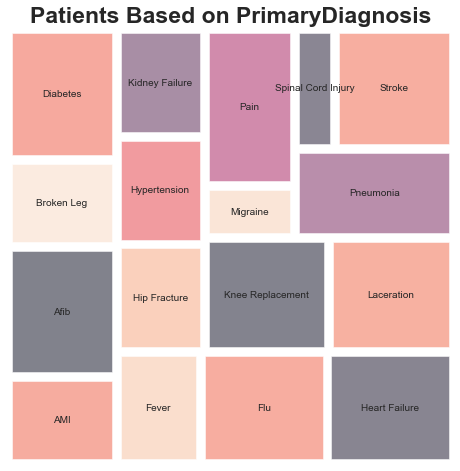

In [83]:
import matplotlib.pyplot as plt
import squarify
data_based_dd_pd.head()

a=data_based_dd_pd.groupby('PrimaryDiagnosis')[['PatientID']].count().index.get_level_values(0).tolist()

b=data_based_dd_pd.groupby('PrimaryDiagnosis')[['PatientID']].count().reset_index().PatientID.values.tolist()
plt.figure(figsize=(8,8))
plt.title("Patients Based on PrimaryDiagnosis",fontsize=23,fontweight="bold")
squarify.plot(sizes=b, label=a, alpha=.5,pad=True)
plt.axis('off')
plt.show()


#pneumonia patients are highest count.

Calculating Average Length of stay

In [101]:
#dataframe used is dfnew_inner.created in above steps. added here for reference.

#dfnew_inner= pd.merge(patients,readmission_reg, on='PatientID', how='inner')
#dfnew_inner.head()

dfnew_inner['LOS'] = (dfnew_inner['dis_Date'] - dfnew_inner['AdmissionDate']).dt.days
dfnew_inner.head()

dfnew_inner['LOS'].mean()



9.534722222222221

exploring which category in the primary diagnosis has the highest values of LOS.


In [104]:
primary_dia_LOS=dfnew_inner.groupby(['PrimaryDiagnosis'])['LOS'].count().reset_index()
primary_dia_LOS

,PrimaryDiagnosis,LOS
0,AMI,48
1,Afib,11
2,Broken Leg,9
3,Diabetes,64
4,Fever,19
5,Flu,80
6,Heart Failure,78
7,Hip Fracture,23
8,Hypertension,50
9,Kidney Failure,20


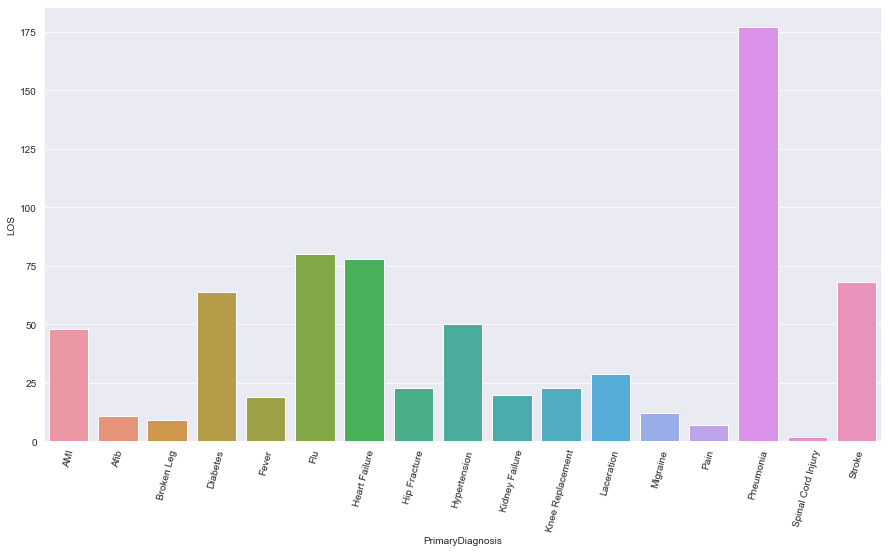

In [144]:
import matplotlib.pyplot as plt
import squarify

plt.figure(figsize=(15,8))
sb.barplot(x = 'PrimaryDiagnosis',y = 'LOS',data =primary_dia_LOS)
plt.xticks(rotation=75)
plt.show()


Patients with Pneumonia have the highest LOS.

Length of Stay by disposition 

In [146]:
LOS_by_disp=dfnew_inner.groupby(['DischargeDisposition'])['LOS'].count().reset_index()
LOS_by_disp.head()

,DischargeDisposition,LOS
0,Expired,104
1,Home,577
2,Transfer,39


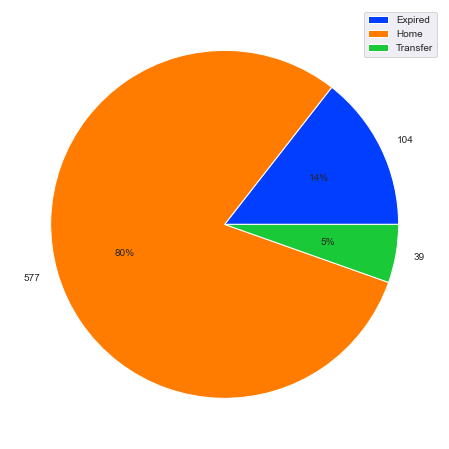

In [153]:
colors = sb.color_palette('bright')[0:5]
plt.figure(figsize=(8,8))
plt.pie(LOS_by_disp["LOS"], labels = LOS_by_disp["LOS"], colors = colors, autopct='%.0f%%')
plt.legend(LOS_by_disp["DischargeDisposition"], loc="best")
plt.show()


80% of patients discharge disposition is home. 14 % of patients are expired.

Expected LOS

<AxesSubplot:xlabel='ExpectedLOS', ylabel='PrimaryDiagnosis'>

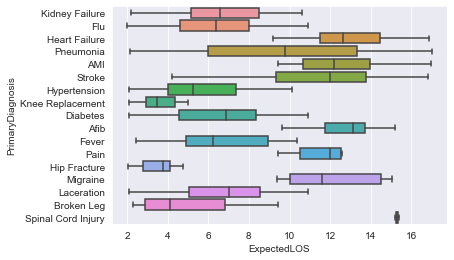

In [160]:


sb.boxplot(x=dfnew_inner.ExpectedLOS,y=dfnew_inner.PrimaryDiagnosis)



Readmission KPI in %

In [310]:

ReAdmissionRate=dfnew_inner['ReadmissionFlag'].sum() / dfnew_inner['AdmissionID'].count()
ReAdmissionRate


print('Readmission Rate of the patients is:', ReAdmissionRate)

Readmission Rate of the patients is: 0.26944444444444443


calculating ReadmissionRate based on PrimaryDiagnosis

In [192]:
Readmission_pd=dfnew_inner.groupby(['PrimaryDiagnosis'])['ReadmissionFlag'].count().reset_index()
Readmission_pd
 
#calculating AdmissionID count based on PrimaryDiagnosis

Readmission_ad=dfnew_inner.groupby(['PrimaryDiagnosis'])['AdmissionID'].count().reset_index()
Readmission_ad

#Joining the above the results

readmission_ad_pd= pd.merge(Readmission_pd,Readmission_ad, on='PrimaryDiagnosis', how='inner')
readmission_ad_pd

#Calculating the Avg of Readmission rate based on PrimaryDiagnosis

readmission_ad_pd['ReadmissionRate']=readmission_ad_pd['ReadmissionFlag'] / readmission_ad_pd['AdmissionID']
readmission_ad_pd


,PrimaryDiagnosis,ReadmissionFlag,AdmissionID,ReadmissionRate
0,AMI,0,48,0.000000
1,Afib,0,11,0.000000
2,Broken Leg,0,9,0.000000
3,Diabetes,0,64,0.000000
4,Fever,0,19,0.000000
5,Flu,20,80,0.250000
6,Heart Failure,45,78,0.576923
7,Hip Fracture,1,23,0.043478
8,Hypertension,17,50,0.340000
9,Kidney Failure,0,20,0.000000


Patients with stroke has the highest readmission rate.

Visualizing the above data.

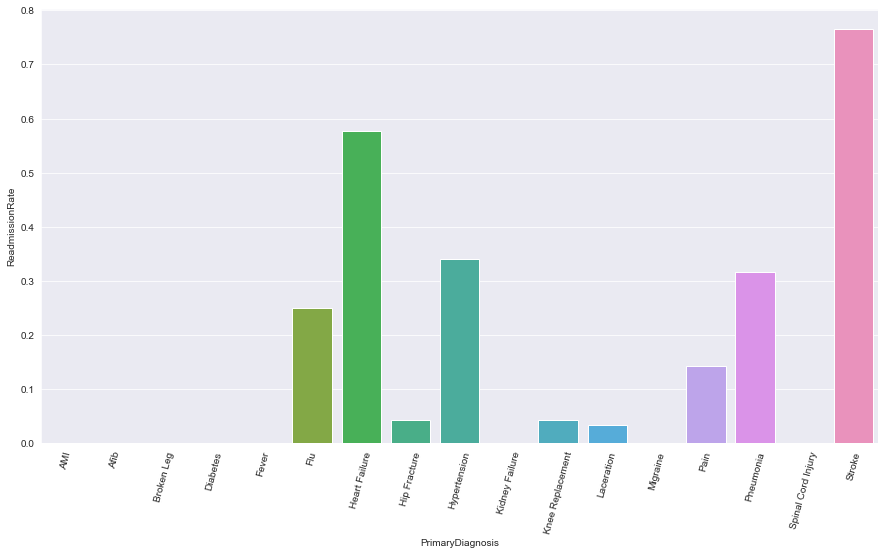

In [191]:

plt.figure(figsize=(15,8))
sb.barplot(x = 'PrimaryDiagnosis',y = 'ReadmissionRate',data =readmission_ad_pd)
plt.xticks(rotation=75)
plt.show()

#Here we can see that Primary diagnosis stroke has the highest readmission rate.

Exploring EDVisits sheet to get some insights.


In [198]:
#Dataframes used in this :

EDVisits=df['EDVisits']
EDVisits.head()
EDVisits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   EDVisitID        1199 non-null   int64         
 1   PatientID        1199 non-null   int64         
 2   VisitDate        1199 non-null   datetime64[ns]
 3   EDDischargeTime  1199 non-null   datetime64[ns]
 4   Acuity           1199 non-null   int64         
 5   ReasonForVisit   1199 non-null   object        
 6   EDDisposition    1199 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 65.7+ KB


Checking % of Missing values.

In [199]:


EDVisits.isnull().sum() / patients.shape[0] * 100

#we don't have any null values.

EDVisitID          0.0
PatientID          0.0
VisitDate          0.0
EDDischargeTime    0.0
Acuity             0.0
ReasonForVisit     0.0
EDDisposition      0.0
dtype: float64

Checking if there are any duplicate values in the EDVisitID column

In [200]:
EDVisits.EDVisitID.value_counts()

#We can conclude that there are no duplicates in Patient_Id column.

1       1
510     1
508     1
507     1
498     1
       ..
938     1
937     1
926     1
925     1
1189    1
Name: EDVisitID, Length: 1199, dtype: int64

Calculating the EDthroughput hours. time spent by patients in ED

In [238]:
EDVisits.head()


EDVisits['EDThroughput']=EDVisits['EDDischargeTime']-EDVisits['VisitDate']
EDVisits['EDThroughput']=EDVisits['EDThroughput']


EDVisits['EDThroughput'].median()

#11.40 Hrs is the centre value spent in ED by a patient.

Timedelta('0 days 11:40:14.642000')

calculating the patients based on reason of visit.

In [308]:


ROV = EDVisits.groupby(['ReasonForVisit','EDDisposition'])['PatientID'].count().reset_index()

ROV

,ReasonForVisit,EDDisposition,PatientID
0,Accident,Admitted,39
1,Bleeding,Admitted,16
2,Bleeding,Discharged,15
3,Car Accident,Admitted,17
4,Chest Pain,Admitted,94
5,Chest Pain,Discharged,15
6,Cough,Discharged,1
7,Fever,Admitted,46
8,Fever,Discharged,188
9,Gun Shot,Admitted,16


ED througput hours based on reason of visit.

In [ ]:


ED_ROV=EDVisits.groupby(['ReasonForVisit'])['EDThroughput'].median().reset_index()

ED_ROV

count of ED visits based on Reason of visit.

In [243]:
cnt_EDV=EDVisits.groupby(['ReasonForVisit'])['EDVisitID'].count().reset_index()
cnt_EDV

,ReasonForVisit,EDVisitID
0,Accident,39
1,Bleeding,31
2,Car Accident,17
3,Chest Pain,109
4,Cough,1
5,Fever,234
6,Gun Shot,16
7,Intoxication,30
8,Laceration,30
9,Migraine,156


To calculate Observed mortality : Expected mortality

In [256]:
#Dataframes used in this:

readmission_reg

OE_data =readmission_reg[(readmission_reg['DischargeDisposition']=='Expired')]
OE_data 

OvsE=OE_data['DischargeDisposition'].count() / readmission_reg['ExpectedMortality'].sum()

OvsE
print('Observed_mortality : Expected mortality is :' , OvsE)



Observed_mortality : Expected mortality is : 0.4272709474250124


observed Mortality by Primary diagnosis.

In [309]:
#Using the below data frame
OE_data  #as it contains only the data with DischargeDisposition 'Expired'

OM_PD=OE_data.groupby(['PrimaryDiagnosis'])['DischargeDisposition'].count().reset_index()
OM_PD.head()


,PrimaryDiagnosis,DischargeDisposition
0,AMI,6
1,Afib,4
2,Broken Leg,3
3,Diabetes,9
4,Fever,4


Analyzing Ambulatory visits sheet

In [280]:

#dataframes used in this:

AmbulatoryVisits= df['AmbulatoryVisits']

AmbulatoryVisits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   VisitID                 950 non-null    int64         
 1   PatientMRN              950 non-null    int64         
 2   ProviderID              950 non-null    int64         
 3   DateofVisit             950 non-null    datetime64[ns]
 4   DateScheduled           950 non-null    datetime64[ns]
 5   VisitDepartmentID       950 non-null    int64         
 6   VisitType               950 non-null    object        
 7   BloodPressureSystolic   826 non-null    float64       
 8   BloodPressureDiastolic  826 non-null    float64       
 9   Pulse                   826 non-null    float64       
 10  VisitStatus             950 non-null    object        
dtypes: datetime64[ns](2), float64(3), int64(4), object(2)
memory usage: 81.8+ KB


In [281]:
AmbulatoryVisits.isnull().sum() / patients.shape[0] * 100

VisitID                    0.000000
PatientMRN                 0.000000
ProviderID                 0.000000
DateofVisit                0.000000
DateScheduled              0.000000
VisitDepartmentID          0.000000
VisitType                  0.000000
BloodPressureSystolic     13.121693
BloodPressureDiastolic    13.121693
Pulse                     13.121693
VisitStatus                0.000000
dtype: float64

Ambulance  Visits KPI - based on visit status

In [299]:
AmbulatoryVisits.head()

AV_KPI=AmbulatoryVisits.groupby(['VisitStatus'])['VisitID'].count().reset_index()
AV_KPI

,VisitStatus,VisitID
0,Canceled,60
1,Completed,736
2,No Show,154


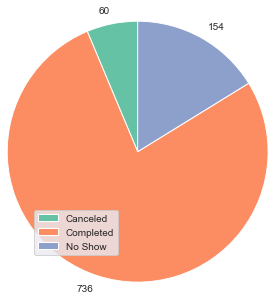

In [286]:
plt.pie(AV_KPI["VisitID"], labels= AV_KPI["VisitID"], radius=1.5,startangle=90)
plt.legend(AV_KPI["VisitStatus"], loc="best")
plt.show()

Calculating No show rate Avg

In [305]:

No_show_data =AV_KPI[(AV_KPI['VisitStatus']=='No Show')]
No_show_rate=No_show_data['VisitID'] / AmbulatoryVisits['VisitID'].count()



2    0.162105
Name: VisitID, dtype: float64

Finding the correlation between the coulumns in AmbulatoryVisits

In [312]:
AmbulatoryVisits

matrix=AmbulatoryVisits.corr()
matrix


,VisitID,PatientMRN,ProviderID,VisitDepartmentID,BloodPressureSystolic,BloodPressureDiastolic,Pulse
VisitID,1.000000,0.519586,-0.039377,0.131367,-0.015248,-0.010427,0.004948
PatientMRN,0.519586,1.000000,0.020446,0.011503,-0.032377,-0.021439,0.030192
ProviderID,-0.039377,0.020446,1.000000,0.016292,0.000766,0.007212,-0.102517
VisitDepartmentID,0.131367,0.011503,0.016292,1.000000,0.023426,0.041818,0.009064
BloodPressureSystolic,-0.015248,-0.032377,0.000766,0.023426,1.000000,0.864880,0.044034
BloodPressureDiastolic,-0.010427,-0.021439,0.007212,0.041818,0.864880,1.000000,0.046617
Pulse,0.004948,0.030192,-0.102517,0.009064,0.044034,0.046617,1.000000


Visualizing the correlation.

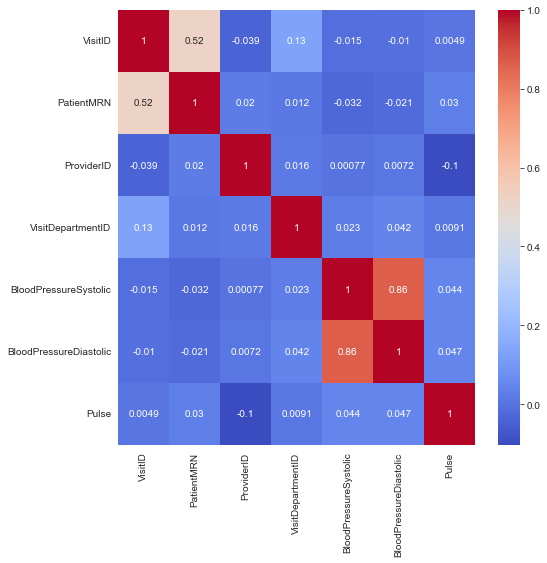

In [313]:
plt.figure(figsize=(8,8))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
dataplot = sb.heatmap(AmbulatoryVisits.corr(), cmap="coolwarm", annot=True)

We can see that blood pressure sistolic & blood pressure diastolic are correlated.

Additional Anlaysis & questions

In [4]:
#Dataframes used in this Analysis

patients=df['Patients']
AmbulatoryVisits=df['AmbulatoryVisits']

#Renaming the column name PatientMRN to PatientID to join both Patients & AmbulatoryVisit dataframes

AmbulatoryVisits.rename(columns = {'PatientMRN':'PatientID'}, inplace = True)
Amb_visit_patients= pd.merge(patients,AmbulatoryVisits, on='PatientID', how='inner')

# Copying each required columns in separate dataframes.

Diastolic_BP=AmbulatoryVisits[['BloodPressureDiastolic']].copy()
Sistolic_BP=AmbulatoryVisits[['BloodPressureSystolic']].copy()
patient_ID=AmbulatoryVisits[['PatientID']].copy()
VisitID=AmbulatoryVisits[['VisitID']].copy()
Pulse=AmbulatoryVisits[['Pulse']].copy()
Age=Amb_visit_patients[['Age']].copy()

# Creating Arrays for each dataframes

array_Diastolic_BP=Diastolic_BP['BloodPressureDiastolic'].to_numpy()
array_Sistolic_BP=Sistolic_BP['BloodPressureSystolic'].to_numpy()
array_patient_ID=patient_ID['PatientID'].to_numpy()
array_VisitID=VisitID['VisitID'].to_numpy()
array_Pulse=Pulse['Pulse'].to_numpy()
array_age=Age['Age'].to_numpy()
dict_ash = {}
dict_bp = {}

#creating a function to assess the BP risk of each patient for each visit

def BPrisk(BloodPressureDiastolic,BloodPressureSystolic):
    if BloodPressureSystolic >=120 and BloodPressureSystolic <130 and BloodPressureDiastolic < 80:
        BPrisk = 'Elevated BP'
    elif (BloodPressureSystolic >=130 and BloodPressureSystolic < 140) or (BloodPressureDiastolic >= 80 and BloodPressureDiastolic < 90):
        BPrisk = 'Stage 1 Hypertension'
    elif BloodPressureSystolic>=140 or BloodPressureDiastolic >= 90:
        BPrisk ='Stage 2 Hypertension'
    else:
        BPrisk = 'Invalid values'
    return BPrisk

#passing the arrays created & results of the function to a dictionary.

for _ in range(len(array_VisitID)):
    dict_bp['BloodPressureDiastolic'] = array_Diastolic_BP[_]
    dict_bp['BloodPressureSystolic'] = array_Sistolic_BP[_]
    dict_bp['PatientID'] = array_patient_ID[_]
    dict_bp['Pulse'] = array_Pulse[_]
    dict_bp['Age'] = array_age[_]
    dict_bp['BPRisk'] = BPrisk(array_Diastolic_BP[_],array_Sistolic_BP[_])
    dict_ash[array_VisitID[_]] = dict_bp
    dict_bp = {}


type(dict_ash)

#We have got the dictionary with all the required data

KeyError: "None of [Index(['Age'], dtype='object')] are in the [columns]"

In [377]:
#creating the dataframe from the dictionary.
Patients_BP = pd.DataFrame.from_dict(dict_ash)

#transpose the dataframe.

Patients_BP_final=Patients_BP.transpose()
Patients_BP_final

# We have got the BP risk of each patient in each visit.

type(Patients_BP_final)
Patients_BP_final.info()
Patients_BP_final


Patients_BP_final.reset_index(inplace=True)
Patients_BP_final = Patients_BP_final.rename(columns = {'index':'VisitID'})
Patients_BP_final.info()

Patients_BP_final

<class 'pandas.core.frame.DataFrame'>
Int64Index: 950 entries, 202 to 695
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   BloodPressureDiastolic  826 non-null    object
 1   BloodPressureSystolic   826 non-null    object
 2   PatientID               950 non-null    object
 3   Pulse                   826 non-null    object
 4   Age                     950 non-null    object
 5   BPRisk                  950 non-null    object
dtypes: object(6)
memory usage: 52.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   VisitID                 950 non-null    int64 
 1   BloodPressureDiastolic  826 non-null    object
 2   BloodPressureSystolic   826 non-null    object
 3   PatientID               950 non-null    object
 4   Pulse           

,VisitID,BloodPressureDiastolic,BloodPressureSystolic,PatientID,Pulse,Age,BPRisk
0,202,144.143427,188.0,840,83.04492,53.0,Stage 2 Hypertension
1,436,118.876808,179.0,820,90.309544,60.0,Stage 2 Hypertension
2,794,98.749563,133.0,879,80.859776,53.0,Stage 1 Hypertension
3,799,98.00127,132.0,884,82.184737,46.0,Stage 1 Hypertension
4,515,85.115632,131.0,32,89.192362,55.0,Stage 1 Hypertension
...,...,...,...,...,...,...,...
945,788,126.695141,187.0,873,70.049167,55.0,Stage 2 Hypertension
946,703,140.703502,182.0,855,73.380812,55.0,Stage 2 Hypertension
947,481,84.841197,150.0,865,61.625454,55.0,Stage 1 Hypertension
948,398,125.037534,177.0,635,53.287036,55.0,Stage 2 Hypertension


Calculating the number of patients based based on BPRisk

In [454]:
BP_Risk_patients=Patients_BP_final.groupby(['BPRisk'])['PatientID'].count().reset_index()
BP_Risk_patients

,BPRisk,PatientID
0,Elevated BP,57
1,Invalid values,124
2,Stage 1 Hypertension,195
3,Stage 2 Hypertension,574


Maximum number patients are having stage 2 Hypertension.

Statistical Analysis

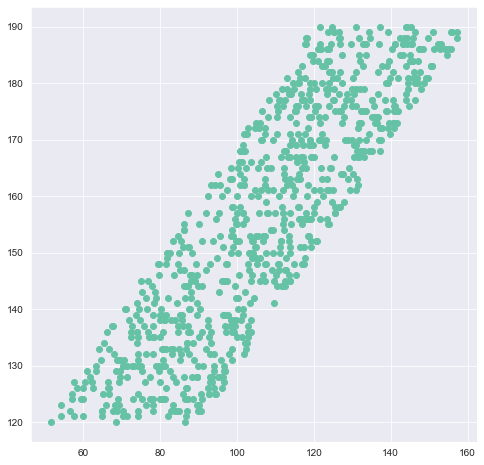

In [437]:
from matplotlib import pyplot
plt.figure(figsize=(8,8))
#sb.scatterplot(x='BloodPressureDiastolic', y='VisitID', data=Patients_BP_final, hue='BloodPressureDiastolic')
data1=Patients_BP_final['BloodPressureDiastolic']
data2=Patients_BP_final['BloodPressureSystolic']
pyplot.scatter(data1,data2)
pyplot.show()


Here we seee the correlation between Diastolic and systolic blood pressure. They both have the linear relationship.

In [434]:
from numpy import mean
from numpy import std
from numpy import cov
from scipy.stats import pearsonr
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))

data1: mean=106.841 stdv=23.206
data2: mean=155.816 stdv=20.496


In [438]:
#changing datatype to float.

type(data1)
floatdata1=data1.astype(float)
floatdata2=data2.astype(float)


In [431]:
#filling null values to 0

result1=floatdata1.fillna(0)
result2=floatdata2.fillna(0)
#floatdata2.fillna(0)
print("Output:", result1.hasnans)
print("Output:", result2.hasnans)

Output: False
Output: False


In [432]:
#calculating the covariance between the varaibles ( disastolic BP & systolic BP)

covariance=np.cov(result1,result2)
print(covariance)

[[1765.55807987 2249.35741325]
 [2249.35741325 3123.91468471]]


As it's difficult to interpret covariance. Let's calculate Pearson's correlation

In [435]:
#Calculating Pearson's correlation.

corr, _ =pearsonr(result1,result2)
print('Pearson correlation : %.3f' % corr)

Pearson correlation : 0.958


Diastolic and systolic blood pressures are positively correlated. The Pearson correlation : 0.958 suggests a high level of correlation.

Visualizing if Age has any relation with BloodPressureDiastolic & BloodPressureSystolic

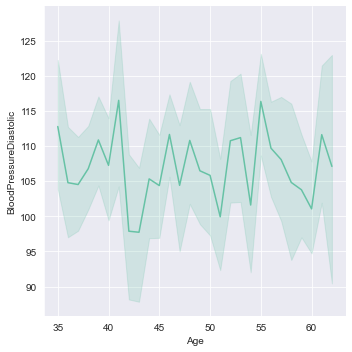

In [447]:
sb.relplot(data=Patients_BP_final, x='Age', y='BloodPressureDiastolic', kind='line')

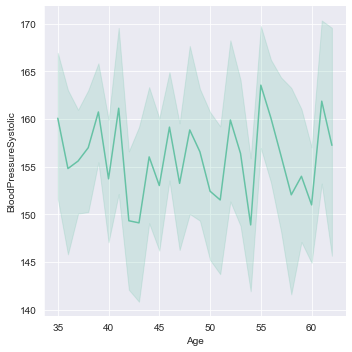

In [448]:
sb.relplot(data=Patients_BP_final, x='Age', y='BloodPressureSystolic', kind='line')

Visualizing pulse variations with respect to Age.

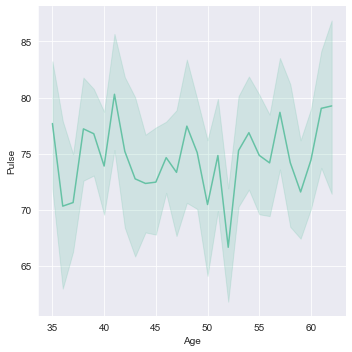

In [450]:
sb.relplot(data=Patients_BP_final, x='Age', y='Pulse', kind='line')

Below are the findings of the Exploratory & statistical Analysis.

Patients DF :

Findings :

1. Male patients are the highest in number.
2.we see some outliers in the patient's age. patients of age 36 - 37 are way more in number & Age 34-35 have the lowest count
3.Majority patients are who speaks english.


Readmission Registry :

Findings :

1. pneumonia patients are highest count.
2. Patients with Pneumonia have the highest LOS.
3. 80% of patients discharge disposition is home. 14 % of patients are expired.
4. Readmission Rate (KPI) of the patients is: 0.26944444444444443
5. Patients with stroke has the highest readmission rate.

EDVisits :

Findings :


1. 11.40 Hrs is the median value spent in ED by a patient.
2. Patients with Fever has the highest visits.
3. Observed_mortality : Expected mortality is : 0.4272709474250124
4. Patients with Diabetes have the highest count of mortality


Ambulatory Visits :

Findings :

1. 0.162105 is No show rate
2. 574 patients have stage 2 hypertension
3. 195 patients have stage 1 hypertension
5. 57 patients have elevated BP


Findings on Statistical Analysis 

1. Seeing the correlation between Diastolic and systolic blood pressure. They both have the linear relationship.
2. Pearson correlation : 0.958 (Diastolic and systolic blood pressure)